In [1]:
import pandas as pd
import numpy as np
import timeit
import datetime as dt
import matplotlib.pyplot as plt
#import plotly.graph_objs as go
%matplotlib inline

In [2]:
from pandas_datareader import data as pdr

C:\Users\reejung\anaconda3\envs\tf\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
date_end = dt.datetime.today()
date_start = date_end - dt.timedelta(30)

## Web scraping S&P100 companies from Wikipedia table

In [4]:
import requests
website_url = requests.get("https://en.wikipedia.org/wiki/S%26P_100").text

from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   S&amp;P 100 - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"d714ef03-f19d-4244-bb15-a047308f9855","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"S\u0026P_100","wgTitle":"S\u0026P 100","wgCurRevisionId":959665002,"wgRevisionId":959665002,"wgArticleId":2658424,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","American stock market indices","S\u0026P Dow Jones Indices"],"wgPageContentLanguage":"en","wgPageContentModel":"wikitext"

In [5]:
wiki_table = soup.find('table',{'class':'wikitable sortable'})

In [6]:
data = []
tHeader = []
SP100_tickers = pd.DataFrame()

for tr in wiki_table.find_all("tr"):
    for th in tr.find_all("th")[:1]:
        tHeader = th.get_text(strip=True)
        SP100_tickers[tHeader] = []
    for td in tr.find_all("td")[:1]:
        data.append( td.get_text(strip=True))
        
SP100_tickers[tHeader] = data

In [7]:
SP100_tickers

,Symbol
0,AAPL
1,ABBV
2,ABT
3,ACN
4,ADBE
...,...
96,VZ
97,WBA
98,WFC
99,WMT


In [8]:
%%time

df = pd.DataFrame()

for i in data:
    symbol = SP100_tickers.loc[SP100_tickers['Symbol']==i]
    try:
        symbol_data = pdr.DataReader(i, 'yahoo', date_start, date_end).reset_index()
        #display(symbol_data)  
    except: 
        print(i + " - Err")
        symbol_data = pd.DataFrame()
        pass
    single_table = pd.concat([symbol, symbol_data], axis=0, ignore_index=False)
    single_table['Symbol'].ffill(inplace=True)
    df = df.append(single_table)
    

BRK.B - Err
Wall time: 1min 5s


In [9]:
df = df.loc[df['Date'].notnull()]

In [10]:
df = df.reset_index(drop=True)

df.groupby(['Symbol']).describe().transpose()

In [11]:
df = df.groupby(['Date', 'Symbol']).sum()

In [31]:
df.unstack()

High                                                \
Symbol            AAPL       ABBV        ABT         ACN        ADBE   
Date                                                                   
2020-05-26  324.239990  93.570000  93.290001  199.990005  391.269989   
2020-05-27  318.709991  91.000000  90.779999  199.949997  375.700012   
2020-05-28  323.440002  91.190002  93.330002  204.179993  386.899994   
2020-05-29  321.149994  92.889999  95.589996  202.410004  389.049988   
2020-06-01  322.350006  93.059998  93.959999  203.750000  389.989990   
2020-06-02  323.440002  91.699997  93.150002  205.789993  390.910004   
2020-06-03  326.200012  91.500000  92.699997  207.830002  391.140015   
2020-06-04  325.619995  93.480003  91.339996  207.789993  395.720001   
2020-06-05  331.750000  95.540001  89.959999  209.720001  396.170013   
2020-06-08  333.600006  95.010002  92.610001  211.320007  398.100006   
2020-06-09  345.609985  96.660004  92.820000  209.789993  402.309998   
2020-06-10  354.769989  99.349998  92.750000  210.830002  409.980011   
2020-06-11  351.059998  96.889999  92.500000  205.949997  404.200012   
2020-06-12  347.799988  94.739998  90.190002  202.429993  411.720001   
2020-06-15  345.679993  94.029999  90.349998  200.740005  406.109985   
2020-06-16  353.200012  96.199997  91.760002  206.880005  414.679993   
2020-06-17  355.399994  97.099998  91.669998  206.330002  417.459991   
2020-06-18  353.450012  96.449997  91.339996  203.169998  420.839996   
2020-06-19  356.559998  98.199997  92.400002  208.289993  429.269989   

                                                                        ...  \
Symbol            AIG         ALL        AMGN         AMT         AMZN  ...   
Date                                                                    ...   
2020-05-26  31.740000   98.120003  228.350006  248.679993  2462.000000  ...   
2020-05-27  32.959999   97.750000  225.130005  252.940002  2413.580078  ...   
2020-05-28  32.189999   99.309998  226.619995  259.470001  2436.969971  ...   
2020-05-29  31.040001   98.029999  230.570007  258.970001  2442.370117  ...   
2020-06-01  30.969999   99.589996  230.539993  266.779999  2476.929932  ...   
2020-06-02  31.760000   99.720001  226.360001  265.589996  2473.530029  ...   
2020-06-03  33.470001  100.910004  224.289993  269.250000  2488.000000  ...   
2020-06-04  35.220001  102.089996  223.449997  266.910004  2507.540039  ...   
2020-06-05  38.970001  106.599998  225.949997  265.910004  2488.649902  ...   
2020-06-08  39.509998  107.080002  226.250000  269.119995  2530.000000  ...   
2020-06-09  38.349998  105.879997  228.309998  267.079987  2626.429932  ...   
2020-06-10  37.299999  104.000000  229.490005  269.029999  2722.350098  ...   
2020-06-11  33.869999  100.230003  229.779999  263.589996  2671.379883  ...   
2020-06-12  33.580002   97.500000  222.350006  259.000000  2621.479980  ...   
2020-06-15  33.570000   98.410004  221.000000  263.079987  2584.000000  ...   
2020-06-16  35.500000  101.080002  228.880005  268.799988  2620.000000  ...   
2020-06-17  33.330002   99.650002  228.809998  268.399994  2655.000000  ...   
2020-06-18  33.000000   99.019997  231.479996  262.029999  2659.639893  ...   
2020-06-19  33.360001  101.000000  239.070007  265.869995  2697.429932  ...   

             Adj Close                                                 \
Symbol             UNH         UNP         UPS        USB           V   
Date                                                                    
2020-05-26  293.625397  168.951981   97.070000  35.830002  193.220001   
2020-05-27  302.467285  172.869995   99.620003  37.619999  192.820007   
2020-05-28  302.666443  170.509995   99.720001  36.509998  194.259995   
2020-05-29  303.542664  169.860001   99.709999  35.560001  195.240005   
2020-06-01  304.618042  169.500000   99.279999  36.689999  194.350006   
2020-06-02  304.996399  170.940002  101.169998  36.619999  196.360001   
2020-06-03  304.040527  178.050003  1

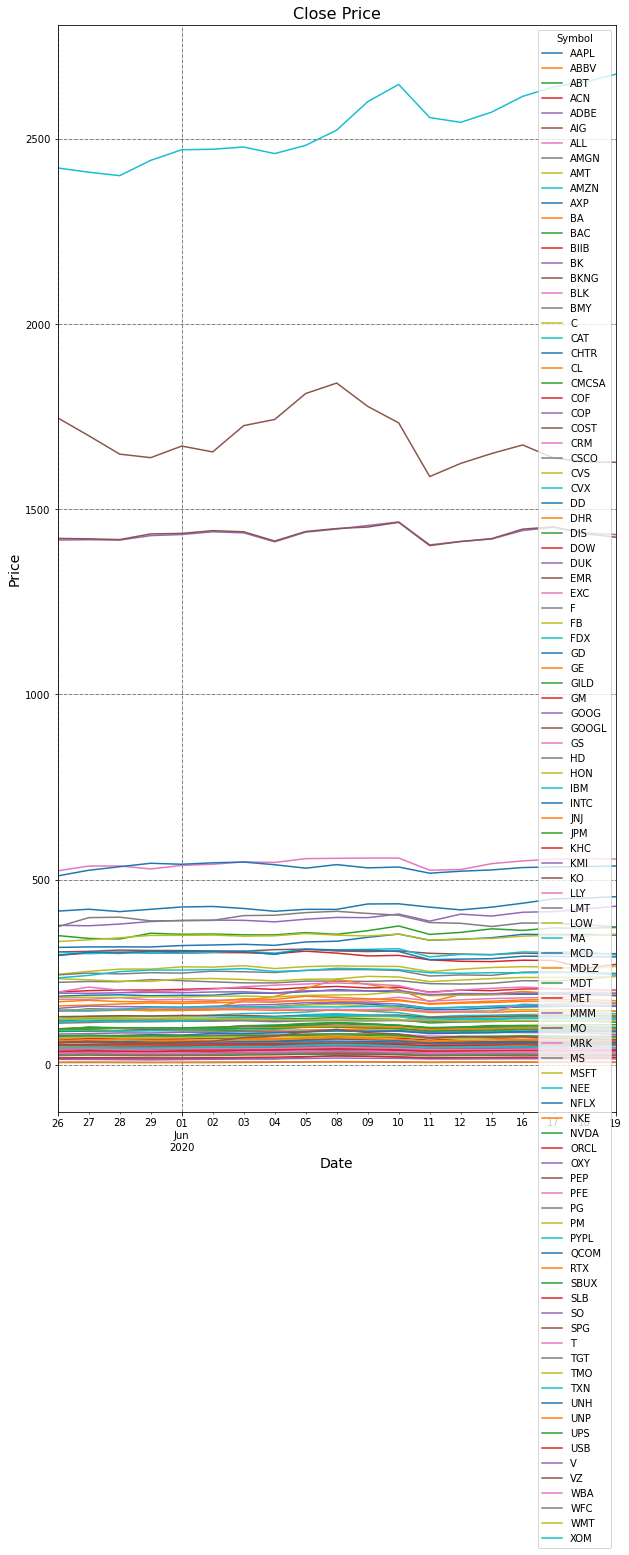

In [33]:
df['Close'].unstack().plot(figsize=(10, 20))
plt.title("Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [34]:
df['Close'].unstack().pct_change()

Symbol,AAPL,ABBV,ABT,ACN,ADBE,AIG,ALL,AMGN,AMT,AMZN,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-27,0.004357,-0.008048,0.014305,0.017974,-0.003876,0.016124,0.039128,0.010836,0.033124,-0.004736,...,0.030113,0.023190,0.026270,0.049958,-0.002070,0.015470,0.019213,0.064356,-0.011142,0.007188
2020-05-28,0.000440,0.000556,0.014764,0.008703,0.012421,-0.012377,0.005423,-0.003025,0.024245,-0.003854,...,0.000658,-0.019156,0.001004,-0.029506,0.007468,0.010519,-0.026530,-0.026118,0.009879,-0.025952
2020-05-29,-0.000974,0.029324,0.030619,-0.000248,0.017824,-0.034062,-0.004580,0.024852,0.000194,0.017188,...,0.002895,-0.003812,-0.000100,-0.026020,0.005045,0.029792,0.026536,-0.027553,0.002991,0.009547
2020-06-01,0.012298,-0.021258,-0.020122,0.008729,0.007967,0.016301,0.012882,-0.012146,0.023783,0.011739,...,0.003543,-0.002119,-0.004313,0.031777,-0.004558,-0.027884,0.008384,0.023423,-0.000806,0.017814
2020-06-02,0.004629,0.003749,-0.004193,0.011801,0.001950,0.030769,-0.000707,-0.014058,-0.002724,0.000554,...,0.001242,0.008496,0.019037,-0.001908,0.010342,0.011115,0.005774,0.011443,-0.000161,0.022256
2020-06-03,0.005505,-0.001648,-0.013172,0.007289,-0.001332,0.055891,0.014242,-0.012158,0.014416,0.002423,...,-0.003134,0.041594,0.024513,0.056253,0.002597,0.007624,0.001378,0.052190,-0.003792,0.040795
2020-06-04,-0.008612,0.023655,-0.034464,-0.020166,-0.010566,0.058947,0.014441,-0.000543,-0.028685,-0.007182,...,-0.023809,-0.009099,-0.004342,0.035936,-0.016407,0.006863,0.013529,0.048214,-0.011015,-0.002843
2020-06-05,0.028481,0.008706,0.018244,0.026539,0.018403,0.032661,0.035441,0.021686,0.019906,0.009103,...,0.046196,0.047611,0.033430,0.057400,0.030830,0.009088,0.026018,0.047981,-0.004504,0.081059


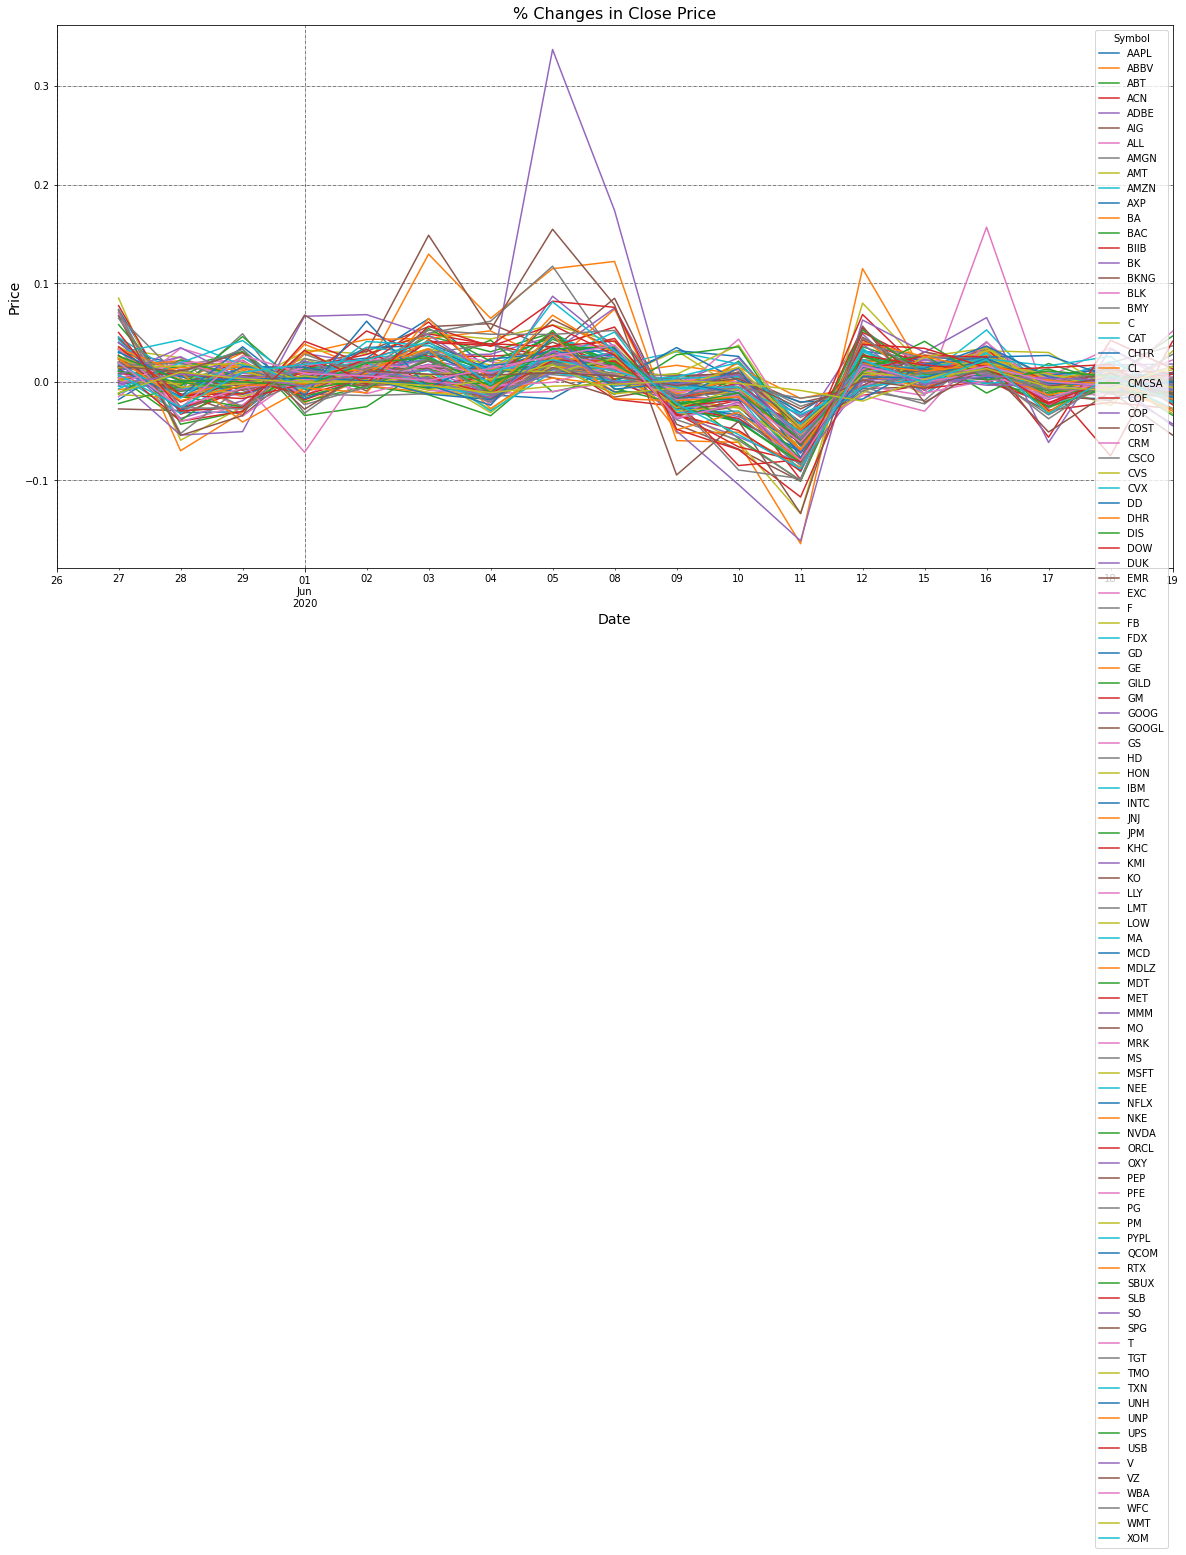

In [37]:
df['Close'].unstack().pct_change().plot(figsize=(20, 10))
plt.title("% Changes in Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()